# Distribution of edge spans in ARGs
### Figures

---

In [1]:
import tskit
import stdpopsim
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
from tqdm.notebook import tqdm
import importlib

import sys 
sys.path.append("../..")
import dolores.edgespans
import dolores.receffect
import dolores.viz
import dolores.simulations

col_green = "#228833"
col_red = "#EE6677"
col_purp = "#AA3377"
col_blue = "#66CCEE"
col_yellow = "#CCBB44"
col_indigo = "#4477AA"
col_grey = "#BBBBBB"

# Simulation parameters
species = stdpopsim.get_species("HomSap")
chr21_contig = species.get_contig(chromosome='chr21', genetic_map="HapMapII_GRCh38")
chr21_mutation_rate = chr21_contig.mutation_rate
chr21_recombination_map = chr21_contig.recombination_map
None_contig = species.get_contig(length=5e6)
None_mutation_rate = None_contig.mutation_rate
None_recombination_map = None_contig.recombination_map
Ne = species.population_size

results_dir = "../../../dolores-paper-data-and-results/simulations-results/"
flatmap = results_dir + "flat-recombination-map/edges/"
chr21map = results_dir + "chr21-recombination-map/edges/"
trees_loc = "../../../dolores-paper-data-and-results/simulations-data/"

# Loading results

In [3]:
results_loc = ""
sim_results_None_100 = dolores.edgespans.read_from_file(flatmap + "simulated_data_smc_prime_100_output-edges/simulated_data_smc_prime_100")
sim_results_None_100_hudson = dolores.edgespans.read_from_file(flatmap + "simulated_data_hudson_100_output-edges/simulated_data_hudson_100")
sim_results_None_100_smc = dolores.edgespans.read_from_file(flatmap + "simulated_data_smc_100_output-edges/simulated_data_smc_100")

sim_results_chr21_10 = dolores.edgespans.read_from_file(chr21map + "simulated_data_smc_prime_10_output-edges/simulated_data_smc_prime_10")
sim_results_chr21_100 = dolores.edgespans.read_from_file(chr21map + "simulated_data_smc_prime_100_output-edges/simulated_data_smc_prime_100")
sim_results_chr21_100_hudson = dolores.edgespans.read_from_file(chr21map + "simulated_data_hudson_100_output-edges/simulated_data_hudson_100")
sim_results_chr21_100_smc = dolores.edgespans.read_from_file(chr21map + "simulated_data_smc_100_output-edges/simulated_data_smc_100")
sim_results_chr21_1000 = dolores.edgespans.read_from_file(chr21map + "simulated_data_smc_prime_1000_output-edges/simulated_data_smc_prime_1000")

argn_results_chr21_10 = dolores.edgespans.read_from_file(chr21map + "argneedle_smc_prime_10_output-edges/argneedle_smc_prime_10")
argn_results_chr21_100 = dolores.edgespans.read_from_file(chr21map + "argneedle_smc_prime_100_output-edges/argneedle_smc_prime_100")
argn_results_chr21_1000 = dolores.edgespans.read_from_file(chr21map + "argneedle_smc_prime_1000_output-edges/argneedle_smc_prime_1000")

relate_results_chr21_10 = dolores.edgespans.read_from_file(chr21map + "relate_smc_prime_10_output-edges/relate_smc_prime_10")
relate_results_chr21_100 = dolores.edgespans.read_from_file(chr21map + "relate_smc_prime_100_output-edges/relate_smc_prime_100")
relate_results_chr21_1000 = dolores.edgespans.read_from_file(chr21map + "relate_smc_prime_1000_output-edges/relate_smc_prime_1000")

tsdate_results_chr21_10 = dolores.edgespans.read_from_file(chr21map + "tsdate_smc_prime_10_output-edges/tsdate_smc_prime_10")
tsdate_results_chr21_100 = dolores.edgespans.read_from_file(chr21map + "tsdate_smc_prime_100_output-edges/tsdate_smc_prime_100")
tsdate_results_chr21_1000 = dolores.edgespans.read_from_file(chr21map + "tsdate_smc_prime_1000_output-edges/tsdate_smc_prime_1000")

argw_results_None_10 = dolores.edgespans.read_from_file(flatmap + "argweaver_smc_prime_10_output-edges/argweaver_smc_prime_10")

['NAME', 'Simulation']
['NUM_edges', '10000']
Read in 10000 edges
['NAME', 'Simulation']
['NUM_edges', '10000']
Read in 10000 edges
['NAME', 'Simulation']
['NUM_edges', '10000']
Read in 10000 edges
['NAME', 'Simulation']
['NUM_edges', '10000']
Read in 10000 edges
['NAME', 'Simulation']
['NUM_edges', '10000']
Read in 10000 edges
['NAME', 'Simulation']
['NUM_edges', '10000']
Read in 10000 edges
['NAME', 'Simulation']
['NUM_edges', '10000']
Read in 10000 edges
['NAME', 'Simulation']
['NUM_edges', '10000']
Read in 10000 edges
['NAME', 'ARG-needle']
['NUM_edges', '10000']
Read in 10000 edges
['NAME', 'ARG-needle']
['NUM_edges', '10000']
Read in 10000 edges
['NAME', 'ARG-needle']
['NUM_edges', '10000']
Read in 10000 edges
['NAME', 'Relate']
['NUM_edges', '10000']
Read in 10000 edges
['NAME', 'Relate']
['NUM_edges', '10000']
Read in 10000 edges
['NAME', 'Relate', '(top_ch)']
['NUM_edges', '10000']
Read in 10000 edges
['NAME', 'tsinfer+tsdate', '(top_ch)']
['NUM_edges', '10000']
Read in 10000 

---

# Q-Q plots

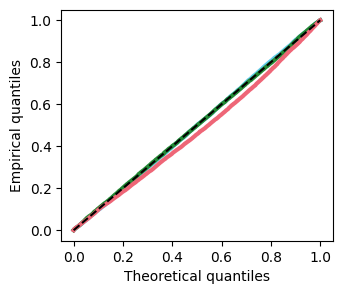

In [6]:
dolores.viz.qqplot(
    [sim_results_chr21_100, sim_results_chr21_100_hudson, sim_results_chr21_100_smc],
    legend_labels=["SMC'", "CwR", "SMC"],
    size = (3.5, 3),
    save_to_file="",
)

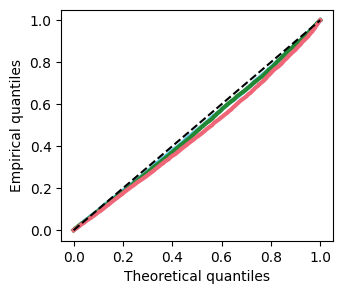

In [7]:
dolores.viz.qqplot(
    [sim_results_None_100, sim_results_None_100_hudson, sim_results_None_100_smc],
    legend_labels=["SMC'", "CwR", "SMC"],
    size = (3.5, 3),
)

Corresponding K-S $p$-values

In [8]:
print(scipy.stats.kstest(sim_results_chr21_100.qsorted, scipy.stats.uniform.cdf))
print(scipy.stats.kstest(sim_results_chr21_100_hudson.qsorted, scipy.stats.uniform.cdf))
print(scipy.stats.kstest(sim_results_chr21_100_smc.qsorted, scipy.stats.uniform.cdf))
print(scipy.stats.kstest(sim_results_None_100.qsorted, scipy.stats.uniform.cdf))
print(scipy.stats.kstest(sim_results_None_100_hudson.qsorted, scipy.stats.uniform.cdf))
print(scipy.stats.kstest(sim_results_None_100_smc.qsorted, scipy.stats.uniform.cdf))

KstestResult(statistic=np.float64(0.007258276779743222), pvalue=np.float64(0.6651242561071591), statistic_location=np.float64(0.7993582767797432), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(0.0053242077749958705), pvalue=np.float64(0.9379012837450094), statistic_location=np.float64(0.8310757922250042), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.04931200130033897), pvalue=np.float64(1.4273686687894137e-21), statistic_location=np.float64(0.578187998699661), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.030688293426322177), pvalue=np.float64(1.2897016510072826e-08), statistic_location=np.float64(0.6568117065736778), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.03261056031942122), pvalue=np.float64(1.1287787782981142e-09), statistic_location=np.float64(0.7406894396805788), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.06476428454975136), pvalue=np.float64(6.558831784839319e-37), statistic_location=np

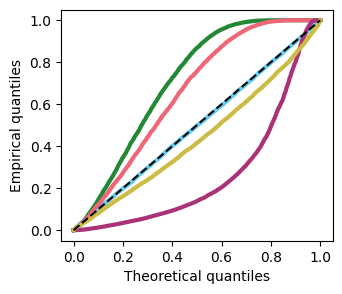

In [9]:
dolores.viz.qqplot(
    [
    sim_results_chr21_10,    
    relate_results_chr21_10,
    tsdate_results_chr21_10,
    argn_results_chr21_10,
    argw_results_None_10,
    ],
    size = (3.5, 3),
)

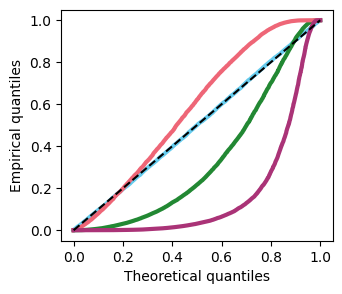

In [10]:
dolores.viz.qqplot(
    [
    sim_results_chr21_100,
    relate_results_chr21_100,
    tsdate_results_chr21_100,
    argn_results_chr21_100,
    ],
    size = (3.5, 3),
)

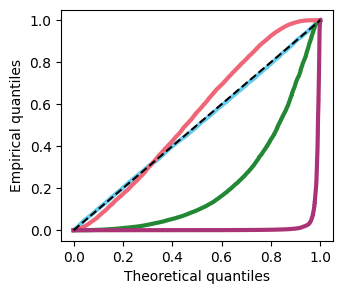

In [11]:
dolores.viz.qqplot(
    [
    sim_results_chr21_1000, 
    relate_results_chr21_1000, 
    tsdate_results_chr21_1000,
    argn_results_chr21_1000,
    ],
    size = (3.5, 3),
)

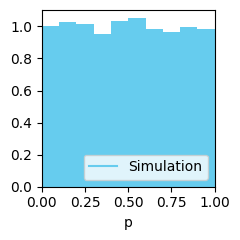

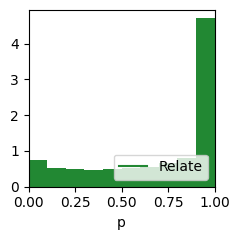

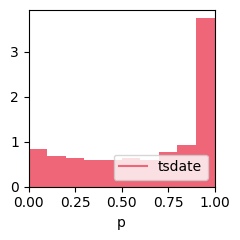

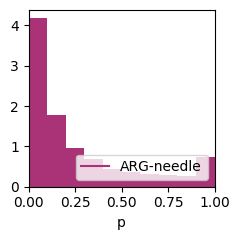

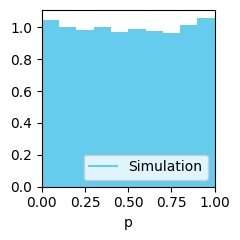

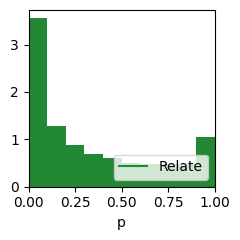

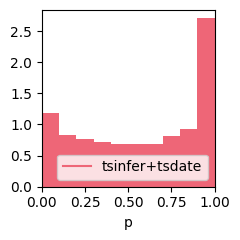

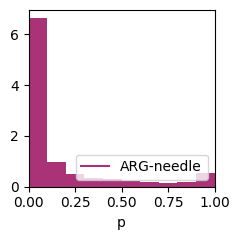

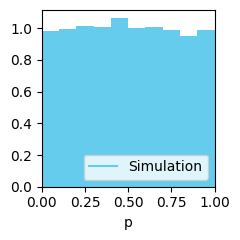

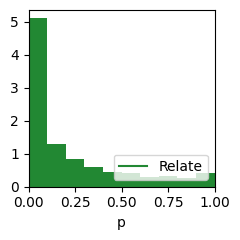

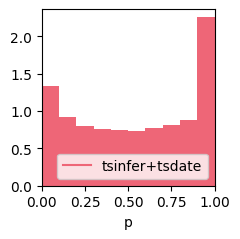

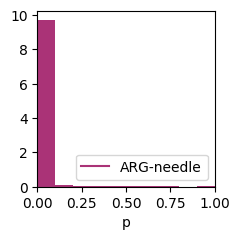

In [12]:
plotsize = (2.5, 2.5)

dolores.viz.qqplot(
    [
    sim_results_chr21_10,
    ],
    hist_plot=True,
    size = plotsize,
    legend_labels=["Simulation"],
)
dolores.viz.qqplot(
    [
    relate_results_chr21_10,
    ],
    hist_plot=True,
    size = plotsize,
    legend_labels=["Relate"],
    colors=[col_green],
)
dolores.viz.qqplot(
    [
    tsdate_results_chr21_10,
    ],
    hist_plot=True,
    size = plotsize,
    legend_labels=["tsdate"],
    colors=[col_red],
)
dolores.viz.qqplot(
    [
    argn_results_chr21_10,
    ],
    hist_plot=True,
    size = plotsize,
    legend_labels=["ARG-needle"],
    colors=[col_purp],
)
dolores.viz.qqplot(
    [
    sim_results_chr21_100,
    ],
    hist_plot=True,
    size = plotsize,
)
dolores.viz.qqplot(
    [
    relate_results_chr21_100,
    ],
    hist_plot=True,
    size = plotsize,
    colors=[col_green],
)
dolores.viz.qqplot(
    [
    tsdate_results_chr21_100,
    ],
    hist_plot=True,
    size = plotsize,
    colors=[col_red],
)
dolores.viz.qqplot(
    [
    argn_results_chr21_100,
    ],
    hist_plot=True,
    size = plotsize,
    colors=[col_purp],
)
dolores.viz.qqplot(
    [
    sim_results_chr21_1000,
    ],
    hist_plot=True,
    size = plotsize,
)
dolores.viz.qqplot(
    [
    relate_results_chr21_1000,
    ],
    hist_plot=True,
    size = plotsize,
    colors=[col_green],
)
dolores.viz.qqplot(
    [
    tsdate_results_chr21_1000,
    ],
    hist_plot=True,
    size = plotsize,
    colors=[col_red],
)
dolores.viz.qqplot(
    [
    argn_results_chr21_1000,
    ],
    hist_plot=True,
    size = plotsize,
    colors=[col_purp],
)

K-S test for depth0:KstestResult(statistic=np.float64(0.016389202805338565), pvalue=np.float64(0.728241294079886), statistic_location=np.float64(0.3919488897132223), statistic_sign=np.int8(1))
K-S test for depth1:KstestResult(statistic=np.float64(0.015862563493906218), pvalue=np.float64(0.8141664433433697), statistic_location=np.float64(0.0941453917767345), statistic_sign=np.int8(-1))
K-S test for depth2:KstestResult(statistic=np.float64(0.019297405778096854), pvalue=np.float64(0.6690476634725891), statistic_location=np.float64(0.1212043863365985), statistic_sign=np.int8(1))
K-S test for depth3:KstestResult(statistic=np.float64(0.01619054014368171), pvalue=np.float64(0.8879742545780325), statistic_location=np.float64(0.6804931406164949), statistic_sign=np.int8(-1))
K-S test for depth4:KstestResult(statistic=np.float64(0.024206109108204976), pvalue=np.float64(0.48743341124160733), statistic_location=np.float64(0.44183803350639606), statistic_sign=np.int8(1))
K-S test for depth5:KstestRe

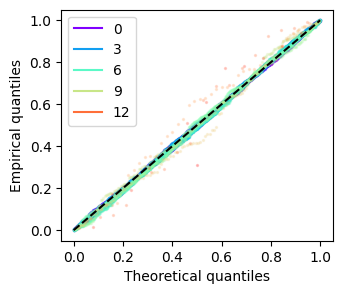

In [13]:
dolores.viz.plots(
    [sim_results_chr21_100], 
    depth_plot = True,
    size=(3.5,3),
)

K-S test for clade size1 with n = 1498 :KstestResult(statistic=np.float64(0.018880128640449495), pvalue=np.float64(0.6524664917046457), statistic_location=np.float64(0.24280211435020468), statistic_sign=np.int8(1))
K-S test for clade size2 with n = 983 :KstestResult(statistic=np.float64(0.03876656973521053), pvalue=np.float64(0.10149439008398231), statistic_location=np.float64(0.7590107202947223), statistic_sign=np.int8(-1))
K-S test for clade size3 with n = 716 :KstestResult(statistic=np.float64(0.02458277777893983), pvalue=np.float64(0.7701896641824113), statistic_location=np.float64(0.22989004034877222), statistic_sign=np.int8(-1))
K-S test for clade size4 with n = 534 :KstestResult(statistic=np.float64(0.02600254757433451), pvalue=np.float64(0.8536554697418048), statistic_location=np.float64(0.5409838209825742), statistic_sign=np.int8(-1))
K-S test for clade size5 with n = 446 :KstestResult(statistic=np.float64(0.05417276438264318), pvalue=np.float64(0.14065022414740447), statistic

/Users/ignatiev/miniconda3/envs/p310/lib/python3.10/site-packages/scipy/stats/_ksstats.py:165: RuntimeWarning: divide by zero encountered in matmul
  H = np.matmul(H, H)
/Users/ignatiev/miniconda3/envs/p310/lib/python3.10/site-packages/scipy/stats/_ksstats.py:165: RuntimeWarning: overflow encountered in matmul
  H = np.matmul(H, H)
/Users/ignatiev/miniconda3/envs/p310/lib/python3.10/site-packages/scipy/stats/_ksstats.py:165: RuntimeWarning: invalid value encountered in matmul
  H = np.matmul(H, H)
/Users/ignatiev/miniconda3/envs/p310/lib/python3.10/site-packages/scipy/stats/_ksstats.py:163: RuntimeWarning: divide by zero encountered in matmul
  Hpwr = np.matmul(Hpwr, H)
/Users/ignatiev/miniconda3/envs/p310/lib/python3.10/site-packages/scipy/stats/_ksstats.py:163: RuntimeWarning: overflow encountered in matmul
  Hpwr = np.matmul(Hpwr, H)
/Users/ignatiev/miniconda3/envs/p310/lib/python3.10/site-packages/scipy/stats/_ksstats.py:163: RuntimeWarning: invalid value encountered in matmul
  Hp

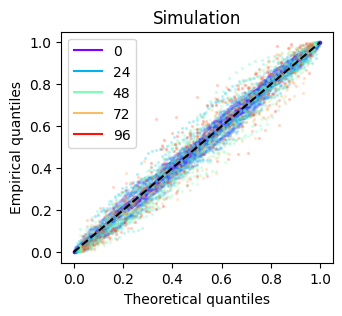

In [14]:
dolores.viz.plots(
    [sim_results_chr21_100], 
    cladesize_plot = True,
    size=(3.5,3),
    figtitle="Simulation",
)

K-S test for depth0:KstestResult(statistic=np.float64(0.551326633614158), pvalue=np.float64(5.429865583152751e-207), statistic_location=np.float64(0.1775806969529236), statistic_sign=np.int8(1))
K-S test for depth1:KstestResult(statistic=np.float64(0.5619263717904547), pvalue=np.float64(8.533e-319), statistic_location=np.float64(0.2135647413994424), statistic_sign=np.int8(1))
K-S test for depth2:KstestResult(statistic=np.float64(0.5617086580385405), pvalue=np.float64(0.0), statistic_location=np.float64(0.18539730812352537), statistic_sign=np.int8(1))
K-S test for depth3:KstestResult(statistic=np.float64(0.5412594342456343), pvalue=np.float64(4.465665780774641e-283), statistic_location=np.float64(0.16165318711358895), statistic_sign=np.int8(1))
K-S test for depth4:KstestResult(statistic=np.float64(0.5406766570035222), pvalue=np.float64(1.4575094190325753e-272), statistic_location=np.float64(0.12431328263430476), statistic_sign=np.int8(1))
K-S test for depth5:KstestResult(statistic=np.fl

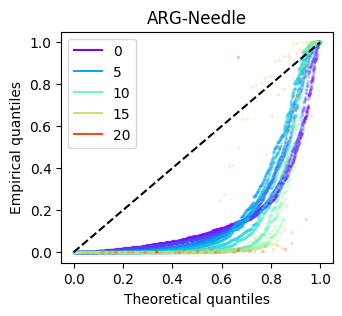

In [15]:
dolores.viz.plots(
    [argn_results_chr21_100], 
    depth_plot = True,
    figtitle="ARG-Needle",
    size=(3.5,3),
)

K-S test for clade size1 with n = 2397 :KstestResult(statistic=np.float64(0.6874600335241239), pvalue=np.float64(0.0), statistic_location=np.float64(0.050962995261858574), statistic_sign=np.int8(1))
K-S test for clade size2 with n = 1127 :KstestResult(statistic=np.float64(0.6442639930726737), pvalue=np.float64(0.0), statistic_location=np.float64(0.09042988447834671), statistic_sign=np.int8(1))
K-S test for clade size3 with n = 644 :KstestResult(statistic=np.float64(0.5538347022525755), pvalue=np.float64(2.8879014743708116e-186), statistic_location=np.float64(0.14492306172257988), statistic_sign=np.int8(1))
K-S test for clade size4 with n = 555 :KstestResult(statistic=np.float64(0.5397430080208793), pvalue=np.float64(7.540138338091651e-152), statistic_location=np.float64(0.11250924423137294), statistic_sign=np.int8(1))
K-S test for clade size5 with n = 401 :KstestResult(statistic=np.float64(0.528133332090039), pvalue=np.float64(8.005329316593692e-105), statistic_location=np.float64(0.09

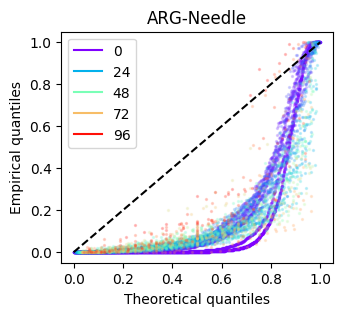

In [16]:
dolores.viz.plots(
    [argn_results_chr21_100], 
    cladesize_plot = True,
    size=(3.5,3),
    figtitle="ARG-Needle",
)

---

# Branch disruption probability and branch duration

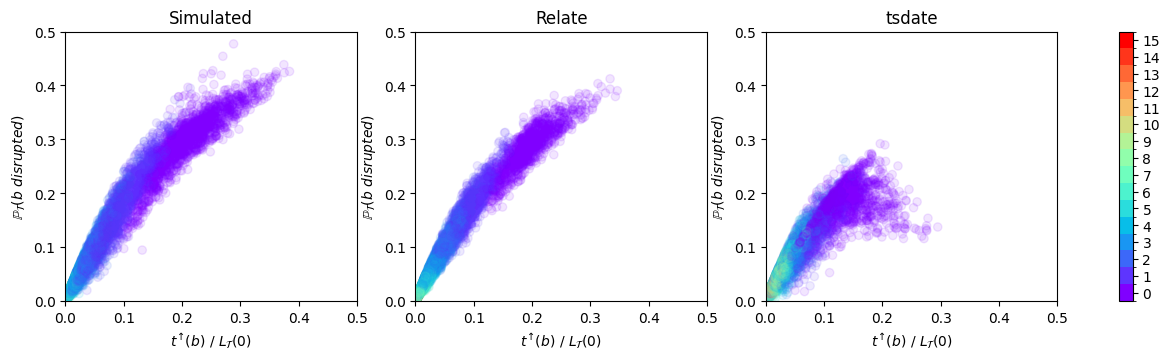

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(16, 3.5))
ax1, ax2, ax3 = axs

cmap = plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(-0.5, max(sim_results_chr21_100.depth)+1, 1), cmap.N)

sc = ax1.scatter(sim_results_chr21_100.age_norm, sim_results_chr21_100.prob, c = sim_results_chr21_100.depth, cmap = cmap, alpha = 0.1, norm=norm)
ax1.set_xlabel("$t^↑(b) \ / \ L_\mathcal{T}(0)$")
ax1.set_ylabel("$\mathbb{P}_{\mathcal{T}}(b \ disrupted)$")
ax1.set_xlim((0,0.5))
ax1.set_ylim((0,0.5))
ax1.set_title("Simulated")

ax2.scatter(relate_results_chr21_100.age_norm, relate_results_chr21_100.prob, c = relate_results_chr21_100.depth, cmap = cmap, alpha = 0.1, norm=norm)
ax2.set_xlabel("$t^↑(b) \ / \ L_\mathcal{T}(0)$")
ax2.set_ylabel("$\mathbb{P}_{\mathcal{T}}(b \ disrupted)$")
ax2.set_xlim((0,0.5))
ax2.set_ylim((0,0.5))
ax2.set_title("Relate")

ax3.scatter(tsdate_results_chr21_100.age_norm, tsdate_results_chr21_100.prob, c = tsdate_results_chr21_100.depth, cmap = cmap, alpha = 0.1, norm=norm)
ax3.set_xlabel("$t^↑(b) \ / \ L_\mathcal{T}(0)$")
ax3.set_ylabel("$\mathbb{P}_{\mathcal{T}}(b \ disrupted)$")
ax3.set_xlim((0,0.5))
ax3.set_ylim((0,0.5))
ax3.set_title("tsdate")

cb = fig.colorbar(sc, ax=axs, ticks = np.linspace(0,max(sim_results_chr21_100.depth)+1,max(sim_results_chr21_100.depth)+2), location = "right")
cb.set_alpha(1)
cb._draw_all()
plt.show()

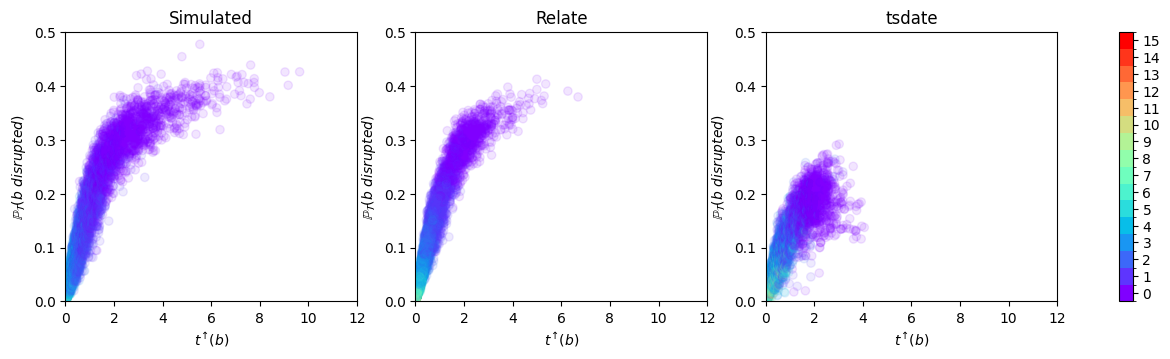

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(16, 3.5))
ax1, ax2, ax3 = axs

cmap = plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(-0.5, max(sim_results_chr21_100.depth)+1, 1), cmap.N)

sc = ax1.scatter(sim_results_chr21_100.age, sim_results_chr21_100.prob, c = sim_results_chr21_100.depth, cmap = cmap, alpha = 0.1, norm=norm)
ax1.set_xlabel("$t^↑(b)$")
ax1.set_ylabel("$\mathbb{P}_{\mathcal{T}}(b \ disrupted)$")
ax1.set_xlim((0,12))
ax1.set_ylim((0,0.5))
ax1.set_title("Simulated")

ax2.scatter(relate_results_chr21_100.age, relate_results_chr21_100.prob, c = relate_results_chr21_100.depth, cmap = cmap, alpha = 0.1, norm=norm)
ax2.set_xlabel("$t^↑(b)$")
ax2.set_ylabel("$\mathbb{P}_{\mathcal{T}}(b \ disrupted)$")
ax2.set_xlim((0,12))
ax2.set_ylim((0,0.5))
ax2.set_title("Relate")

ax3.scatter(tsdate_results_chr21_100.age, tsdate_results_chr21_100.prob, c = tsdate_results_chr21_100.depth, cmap = cmap, alpha = 0.1, norm=norm)
ax3.set_xlabel("$t^↑(b)$")
ax3.set_ylabel("$\mathbb{P}_{\mathcal{T}}(b \ disrupted)$")
ax3.set_xlim((0,12))
ax3.set_ylim((0,0.5))
ax3.set_title("tsdate")

cb = fig.colorbar(sc, ax=axs, ticks = np.linspace(0,max(sim_results_chr21_100.depth)+1,max(sim_results_chr21_100.depth)+2), location = "right")
cb.set_alpha(1)
cb._draw_all()

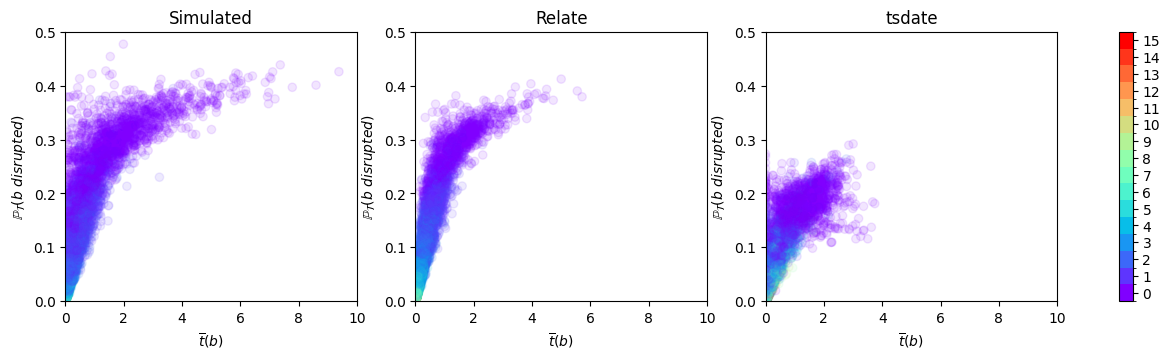

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(16, 3.5))
ax1, ax2, ax3 = axs

cmap = plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(-0.5, max(sim_results_chr21_100.depth)+1, 1), cmap.N)

sc = ax1.scatter(sim_results_chr21_100.time, sim_results_chr21_100.prob, c = sim_results_chr21_100.depth, cmap = cmap, alpha = 0.1, norm=norm)
ax1.set_xlabel("$\overline{t}(b)$")
ax1.set_ylabel("$\mathbb{P}_{\mathcal{T}}(b \ disrupted)$")
ax1.set_xlim((0,10))
ax1.set_ylim((0,0.5))
ax1.set_title("Simulated")

ax2.scatter(relate_results_chr21_100.time, relate_results_chr21_100.prob, c = relate_results_chr21_100.depth, cmap = cmap, alpha = 0.1, norm=norm)
ax2.set_xlabel("$\overline{t}(b)$")
ax2.set_ylabel("$\mathbb{P}_{\mathcal{T}}(b \ disrupted)$")
ax2.set_xlim((0,10))
ax2.set_ylim((0,0.5))
ax2.set_title("Relate")

ax3.scatter(tsdate_results_chr21_100.time, tsdate_results_chr21_100.prob, c = tsdate_results_chr21_100.depth, cmap = cmap, alpha = 0.1, norm=norm)
ax3.set_xlabel("$\overline{t}(b)$")
ax3.set_ylabel("$\mathbb{P}_{\mathcal{T}}(b \ disrupted)$")
ax3.set_xlim((0,10))
ax3.set_ylim((0,0.5))
ax3.set_title("tsdate")

cb = fig.colorbar(sc, ax=axs, ticks = np.linspace(0,max(sim_results_chr21_100.depth)+1,max(sim_results_chr21_100.depth)+2), location = "right")
cb.set_alpha(1)
cb._draw_all()

---

# Expected number of mutations per branch

In [20]:
ts_sim = tskit.load(trees_loc + "chr21-recombination-map/simulated_data_smc_prime_10.trees")
ts_relate = tskit.load(trees_loc + "chr21-recombination-map/relate_smc_prime_10.trees")
ts_tsdate = tskit.load(trees_loc + "chr21-recombination-map/tsdate_smc_prime_10.trees")
ts_argn = tskit.load(trees_loc + "chr21-recombination-map/argneedle_smc_prime_10.trees")
relate_handle = trees_loc + "chr21-recombination-map/relate_smc_prime_10"

# ts_sim = tskit.load(trees_loc + "chr21/simulated_data_smc_prime_100.trees")
# ts_relate = tskit.load(trees_loc + "chr21/relate_smc_prime_100.trees")
# ts_tsdate = tskit.load(trees_loc + "chr21/tsdate_smc_prime_100.trees")
# ts_argn = tskit.load(trees_loc + "chr21/argneedle_smc_prime_100.trees")
# relate_handle = trees_loc + "chr21/relate_smc_prime_100"

# ts_sim = tskit.load(trees_loc + "chr21/simulated_data_smc_prime_1000.trees")
# ts_relate = tskit.load(trees_loc + "chr21/relate_smc_prime_1000.trees")
# ts_tsdate = tskit.load(trees_loc + "chr21/tsdate_smc_prime_1000.trees")
# ts_argn = tskit.load(trees_loc + "chr21/argneedle_smc_prime_1000.trees")
# relate_handle = trees_loc + "chr21/relate_smc_prime_1000"

In [21]:
A1 = np.zeros(ts_sim.num_edges)
A2 = np.zeros(ts_tsdate.num_edges)
A3 = np.zeros(ts_argn.num_edges)
B1 = np.zeros(ts_sim.num_edges)
B2 = np.zeros(ts_tsdate.num_edges)
B3 = np.zeros(ts_argn.num_edges)
M = np.zeros(ts_sim.num_edges)
mut_dict = {e.id:0 for e in ts_sim.edges()}
for m in ts_sim.mutations():
    M[m.edge] += 1
with tqdm(total = ts_sim.num_edges) as pbar:
    for e in ts_sim.edges():
        T = ts_sim.node(e.parent).time - ts_sim.node(e.child).time
        D = e.right - e.left
        B1[e.id] = D
        A1[e.id] = T * D * chr21_mutation_rate
        pbar.update(1)
with tqdm(total = ts_tsdate.num_edges) as pbar:
    for e in ts_tsdate.edges():
        T = ts_tsdate.node(e.parent).time - ts_tsdate.node(e.child).time
        D = e.right - e.left
        B2[e.id] = D
        A2[e.id] = T * D * chr21_mutation_rate
        pbar.update(1)
with tqdm(total = ts_argn.num_edges) as pbar:
    for e in ts_argn.edges():
        T = (ts_argn.node(e.parent).time - ts_argn.node(e.child).time)
        D = e.right - e.left
        B3[e.id] = D
        A3[e.id] = T * D * chr21_mutation_rate
        pbar.update(1)
edges_relate, edge_durations_relate, edge_lengths_relate = dolores.simulations.read_anc_file(relate_handle, ts_relate.sequence_length, supported_only=False)
A4 = np.zeros(len(edges_relate))
B4 = np.zeros(len(edges_relate))
i = 0
with tqdm(total = len(edges_relate)) as pbar:
    for ind in edges_relate.values():
        left = edge_durations_relate[ind][0]
        right = edge_durations_relate[ind][1]
        B4[i] = right - left
        A4[i] = (right - left) * edge_lengths_relate[ind] * chr21_mutation_rate
        i += 1
        pbar.update(1)

  0%|          | 0/164862 [00:00<?, ?it/s]

  0%|          | 0/39339 [00:00<?, ?it/s]

  0%|          | 0/270245 [00:00<?, ?it/s]

Trees: 2907
Samples: 10
Unique edges: 24650 of which 24650 have at least one mutation


  0%|          | 0/24650 [00:00<?, ?it/s]

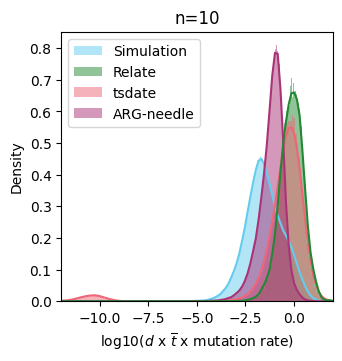

In [22]:
plt.subplots(1, 1, figsize=(3.5, 3.5))
plt.hist(np.log10(A1), bins=200, alpha = 0.5, density=True, color=col_blue, label="Simulation")
plt.hist(np.log10(A4), bins=200, alpha = 0.5, density=True, color=col_green, label="Relate")
plt.hist(np.log10(A2), bins=200, alpha = 0.5, density=True, color=col_red, label="tsdate")
plt.hist(np.log10(A3), bins=200, alpha = 0.5, density=True, color=col_purp, label="ARG-needle")
plt.xlim((-12, 2))
plt.xlabel("log10($d$ x $\overline{t}$ x mutation rate)")
plt.ylabel("Density")
plt.title("n=10")
kde1 = stats.gaussian_kde(np.log10(A1))
kde2 = stats.gaussian_kde(np.log10(A2))
kde3 = stats.gaussian_kde(np.log10(A3))
kde4 = stats.gaussian_kde(np.log10(A4))
xx = np.linspace(-12, 2, 100)
plt.plot(xx, kde1(xx), color=col_blue)
plt.plot(xx, kde2(xx), color=col_red)
plt.plot(xx, kde3(xx), color=col_purp)
plt.plot(xx, kde4(xx), color=col_green)
plt.legend(loc="upper left")

# Observed branch duration

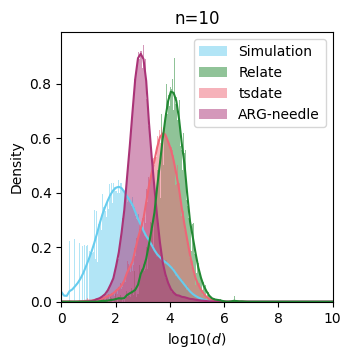

In [23]:
plt.subplots(1, 1, figsize=(3.5, 3.5))
plt.hist(np.log10(B1), bins=200, alpha = 0.5, density=True, color=col_blue, label="Simulation")
plt.hist(np.log10(B4), bins=200, alpha = 0.5, density=True, color=col_green, label="Relate")
plt.hist(np.log10(B2), bins=200, alpha = 0.5, density=True, color=col_red, label="tsdate")
plt.hist(np.log10(B3), bins=200, alpha = 0.5, density=True, color=col_purp, label="ARG-needle")
plt.xlim((0, 10))
plt.xlabel("log10($d$)")
plt.ylabel("Density")
plt.title("n=10")
kde1 = stats.gaussian_kde(np.log10(B1))
kde2 = stats.gaussian_kde(np.log10(B2))
kde3 = stats.gaussian_kde(np.log10(B3))
kde4 = stats.gaussian_kde(np.log10(B4))
xx = np.linspace(0, 10, 100)
plt.plot(xx, kde1(xx), color=col_blue)
plt.plot(xx, kde2(xx), color=col_red)
plt.plot(xx, kde3(xx), color=col_purp)
plt.plot(xx, kde4(xx), color=col_green)
plt.legend(loc="upper right")